# Challenge 1
"Francesco wants to know which factors influence the value of a diamond: he is not an expert, he wants simple and clear messages. However, he trusts no one, and he hired another data scientist to get a second opinion on your work. Create a Jupyter notebook to explain what Francesco should look at and why. Your code should be understandable by a data scientist, but your text should be clear for a layman."

## Cleaning

> **Me:** Caro Francesco, I would like, before we start our work, to make some simple analysis on the dataset you handed me. I want to check if some of the information needs some cleaning before we start our analysis. Is that ok?

> **Francesco:** The data is just fine. Don't mess with my data. It took me many years to collect this information. You hear me!?

> **Me:** It's ok, it's ok. I won't modify anything you gave me. I will just check the consistency of the data and, if I find anything strange I will let you know and we will handle it together, ok?

> **Francersco:** OK, OK. Mi racommando...

I will proceed to do some checks on the data.

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest, f_classif


import scipy.stats as st

In [25]:
data = pd.read_csv('../datasets/diamonds/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82


In [26]:
print(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


> **Me:** As you can see from the previous snippets Francesco, carat, depth, table, x, y and z are numerical variables and 'cut', 'color', 'clarity' are what we call categorical variables: they can only have a finite number of possible values which in this case are the texts representing the cuts, colors and clarities.

> **Francesco:** Yes I understand that.

> **Me:** Moreover, the categorical 'cut', 'color', and 'clarity' are what we call ordinal variables, since the categories can be ordered. For example you know that the color letter describe colors which go from absolutely colorless, to light yellow.

> **Francesco:** I agree. I am afraid you are explaining me things too well. I don't understand if that means you are a good teacher or it means you consider me pretty stupid. Be careful.

We separate numerical and categorical variables column names:

In [27]:
cath_columns = list(data.select_dtypes(include=[object]).columns)
print(cath_columns)
num_columns = list(data.select_dtypes(exclude=[object]).columns)
print(num_columns)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


> **Me:** In the catalog you gave me it said that I should find the values `['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']` for the cut, the values `['D', 'E', 'F', 'G', 'H', 'I', 'J']` for the color, and `['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1' ]` for the clarity. And that those are the order of the categories for cut, color and clarity. So we will define the ordered categories dictionary, for future use, and we will check if in your 5000 diamonds dataset, the values for the categorical variables are only those values you told me I would find in the dataset.

> **Francesco:** What do you mean? You don't trust me??!!!

> **Me:** Yes!! Don't get mad. I trust you. But one should always be sure no mistakes were made during the data entry process.

In [28]:
ordered_categories = {'cut': ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
                       'color': ['D', 'E', 'F', 'G', 'H', 'I', 'J'], 
                       'clarity': ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1' ]}

In [29]:
for col in cath_columns:
  print(col+": ", end= "")
  print(data[col].unique())

cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color: ['H' 'I' 'F' 'G' 'E' 'D' 'J']
clarity: ['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


> **Me:** So we see that, as expected, the values we see in the cut, color and clarity columns are just the values, all the values, and only the values you told me I would find.

> **Francesco:** I told you so.

> **Me:** Let us make a simple statistical description of all the other columns, the numerical ones.

> **Francesco:** What do you mean?

> **Me:** You'll see.

In [30]:
data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


> **Me:** Mmm. This is worrisome, you see, I am seeing that for column `price`, the minimum is `-1`. Moreover you can also see that the minimum for `x`, `y` and `z` is zero. Those are unacceptable values. I was hoping to obtain all positive numerical values for these columns.

> **Francesco:** Ups, you are right. I must have screwed up somewhere. How big is the problem? How many diamonds have this strange information?

> **Me:** Let's see

In [31]:
data[data['price']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [32]:
data[data['z']<=0]

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


> **Me:** From the previous snippets you can see that we have 10 diamonds which were classified with `price = -1` and one diamond with zero coordinates. What do you think we should do with these?

> **Francesco:** The 10 with negative price, just drop them. I just want to know what influences price so these 10 entries won't do for that kind of explanation. The one with missing coordinates we could keep it, it might have relevant information we wouldn't want to miss, I think. On the other hand, it having inconsistent number for its coordinates makes me wonder if the other information about it might be corrupt. It being only one.... just drop it. We don't miss much.

> **Me:** Ok.

In [33]:
data = data[(data['z']>0) & (data['price']>0)].reset_index(drop= True)
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,Ideal,H,VVS1,61.2,57.0,655,4.30,4.39,2.66


> **Me:** With the data clean let us make the statistical description again:

In [34]:
data.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


> **Me:** If we define the coefficient of variation ($CV$) as the ratio between standard deviation and mean we see that both carat and price have $CV\sim 1$ while depth and table have $CV<< 1$; this is, the carat and price distribution is pretty broad while that of depth and table are very narrow.

## Correlation

> **Me:** Now with our dataset clean we have to start working on the original task you put me in charge of: understanding which are the factors which influence the value of a diamond. For this we shall speak about a statistical concept called correlation. Have you ever heard about it?

> **Francesco:** I barely understand English, correlation... ma che cavolo è?

> **Me:** Don't worry. I'll explain it simple. I know for a fact you have a nice luxurious sailing boat and that you usually go sailing in Lago di Como and compete with other friends. Say we compare your sailing hour habits with those of a friend called Emanuele. You notice that whenever you spend more time sailing in a month, your friend also tends to spend more time sailing. And when you have a busy month with less sailing time, your friend's sailing time also decreases. This suggests that there's some connection between your sailing habits.

> Now, correlation is like a helpful tool to measure how closely your sailing times are related. It gives us a number called the "correlation coefficient." This number tells us if your sailing hours tend to follow similar patterns, opposite patterns, or if there's no specific pattern.

> If the correlation coefficient is +1, it means that your sailing hours are perfectly connected. This probably means that you and Emanuele always sail together, either in the same yacht or competing one against the other. 

> If the correlation coefficient is -1, it means your sailing hours move in opposite directions. This could happen for example if Emanuele, who doesn't like to lose against you, participates in all the regattas you don't participate in on purpose.

> If the correlation coefficient is 0, it means there's no clear connection between your sailing hours. Your sailing time changes don't really give any clues about what your Emanuele's sailing time will be.

> Values in between mean that your sailing times are connected, because maybe sometimes you sail together, but not necessarily always, and there could be other factors influencing your sailing hours. 

> So, correlation helps us understand how two things are related, like your sailing hours and Emanuele's sailing hours. It's like a math superpower that reveals hidden connections between things we're interested in! In particular, the most famous correlation is called Pearson correlation and it measures how linear the relation between your sailing hours and Emanule's sailing hours is. When the behavior one expects between two variables is more complicated one uses Spearman correlation: it gives us an idea of how well we could describe the relation between both sailing times with an arbitrary monotonic function.

> **Francesco:** I was following you well until you said "monotonic".

> **Me:** It just means that the sailing hours of you and Emanuele move either on the same direction or on opposite directions all the time. So we will now do the following with the data: first, we are going to encode the categorical data into integer numbers. For example, for the colors D to J, we will assign numbers from 0 to 6. We need this in order to then compute correlations. Then we will compute the correlation between each possible pair of variables of the dataset so that we start seeing relations between variables. While we will talk of other relations, pay special attention to the relation between price and the other variables, which is the main objective of this session, ok?

> **Francesco:** Let us have a coffee pause and then we do this, I feel very tired with all this math.

> **Me:** Come on! Coraggio!

In [35]:
data_enc = data.copy()

# It is very important we don't allow the OrdinalEncoder to choose the order for the encoding since
# the categorical variable have a meaningful hierarchy. 
myenc = OrdinalEncoder(categories = list(ordered_categories.values()))

myenc.fit(data[cath_columns])

data_enc[cath_columns] = myenc.transform(X=data_enc[cath_columns])



In [36]:
data_enc.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4984,0.38,0.0,4.0,2.0,62.3,53.3,832,4.65,4.69,2.91
4985,0.33,1.0,3.0,2.0,61.3,59.0,927,4.45,4.42,2.72
4986,1.25,0.0,6.0,2.0,62.1,56.0,5980,6.81,6.84,4.24
4987,0.31,1.0,2.0,4.0,62.9,58.0,802,4.31,4.27,2.70
4988,0.30,0.0,4.0,1.0,61.2,57.0,655,4.30,4.39,2.66


<Axes: >

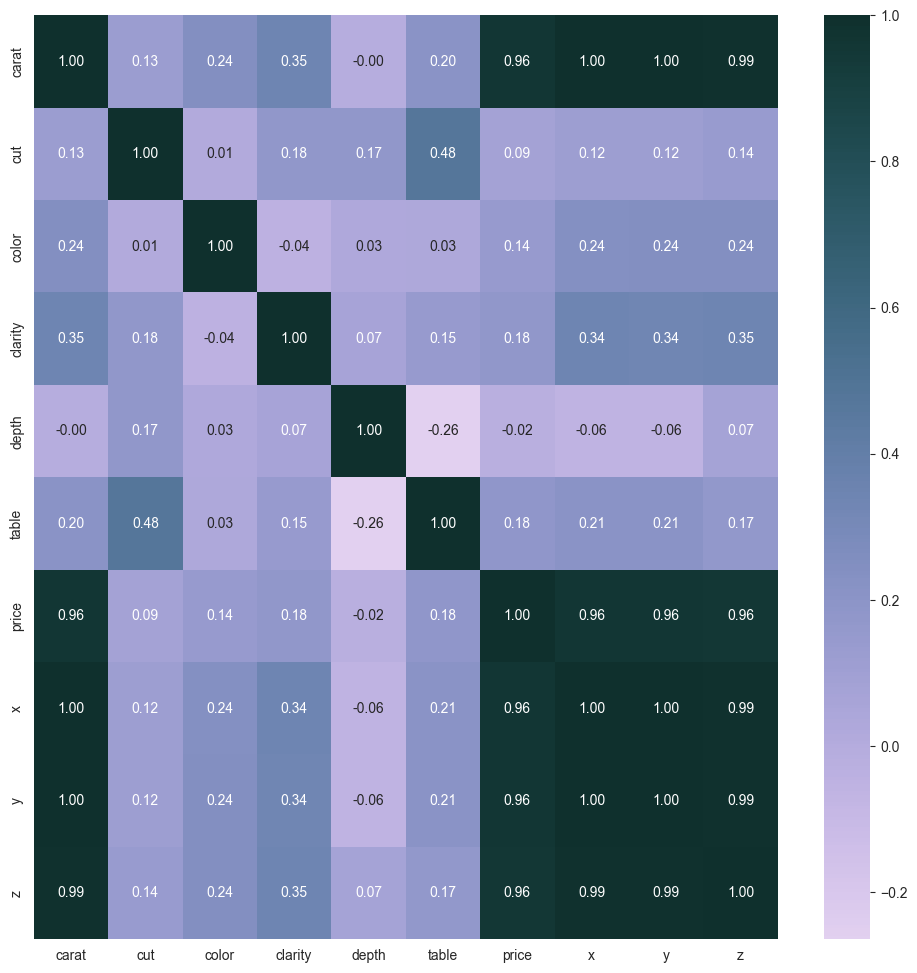

In [37]:
cmap = sns.cubehelix_palette(start=2.2, as_cmap=True)
corrmat= data_enc.corr(method='spearman') 
f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corrmat,cmap=cmap,annot=True, fmt='.2f', cbar=True)

> **Francesco:** If I understood your explanation correctly, the main features related to price, the ones with the darkest squares on the heatmap you present are carat, x, y and z, which makes sense to me.

> **Me:** That's interesting. Why does it make sense to you?

> **Francesco:** Well.. intuitively, bigger diamonds means more expensive diamonds, roughly. Of course other factors influence.

> **Me:** We could say your intuition is correct, at least statistically speaking in the sample you brought me. After those features, with much smaller correlation, we could mention color and clarity on the categorical features on the one hand and table on the numerical features on the other hand.

## Geometry

> **Me:** Before digging deeper into your original concern, that is, understanding which are the main features of the diamonds which influence its price let as make the following observation. Besides the relation between features and prices, from observing the correlation heatmap I presented you earlier you can see there is a very strong relation between `x`, `y`, `z` and `carat`. In fact, the Spearman correlation among those four are in the range 0.99-1.00. Moreover the Pearson correlation, the one measuring linearity in the relation, is > 0.98 for the relation between `carat` and `x`, `y` and `z`. All these strong correlations can be explained easily in terms of the geometry of the diamond.

> **Francesco:** But why is this relevant for understanding the price of the diamonds?

> **Me:** We'll arrive there. Be patient. So I was saying... As you may well know the `carat` of the diamond is its mass, and a unit of carat equals $200 mg$. Taking the average density of a diamond being $3.52mg/mm^3$ we can obtain the volume of the diamond in $mm^3$ by multiplying its carat by $\sim 56.82$. Now consider an "ideal" diamond as in the figure you gave me to explain the meaning of the features of the diamonds:

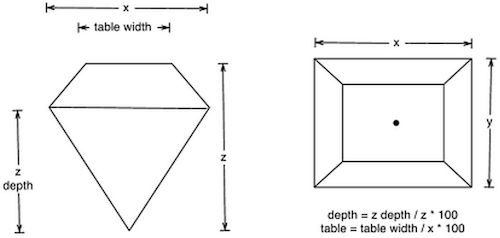

> It is formed by attaching an inverted pyramid with a rectangular frustum of a pyramid. It is not difficult to show that the volume of it is given by

$$ V = \frac{x y z}{3}\left[1+t(1+t)(1-d)\right] $$

> where $t$ is `table`/100 and $d$ is `depth`/100. But recall that `carat` (let us call it $K$) and volume are the same up to a factor so we have

\begin{equation}
%\label{geometry}
 K\frac{200}{3.52} = \frac{x y z}{3}\left[1+t(1+t)(1-d)\right]
\end{equation}

> **Francesco:** That's a nice formula I didn't know about. How did you get it?

> **Me:** Just google the volume formulas for rectangular pyramids and rectangular frustum of a pyramid and you get there. But recall: this is the formula for the ideal diamond as in the figure. Real diamonds will not have this exact behavior but nevertheless, this formula, gives a good approximation and allows as to understand that since the volume of the ideal diamond is characterized by the product $x y z$ it is reasonable that `carat` is almost proportion to `x`, `y` and `z`. In fact consider for a second the part between brackets: $1+t(1+t)(1-d)$. Since both $t$ and $d$ are between 0 and 1 by definition, the bracket should lie between 1 and 2. But as it can be seen from our previous snippets, both `table` and `depth` are narrowly distributed, so, if the ideal volume formula is a good approximation for real diamonds, the ratio

$$\chi = \frac{K}{xyz}\frac{600}{3.52}$$ 

> should also be narrow. Do you follow me?

> **Francesco:** I think so.

> **Me:** Let us test this idea. Consider the statistical description of the ratio $\chi$ for our diamond sample:

In [38]:
X = (data['carat']*200/3.52)/((1/3)*(data['x'])*(data['y'])*(data['z']))
X.describe()


count    4989.000000
mean        1.044374
std         0.037734
min         0.528494
25%         1.030961
50%         1.042308
75%         1.054933
max         3.229639
dtype: float64

> **Me:** From that you can see that even if there are some outliers, the sample has a mean close to 1 and a small 0.03 standard deviation. The coefficient of variation, $std/mean$ is $3.6\%$. The distribution is so narrow that in fact I can almost assure you that if I choose a random diamond from the sample, there is a 95% chance the diamond has a $\chi$ ratio in the interval:

In [39]:
interval = st.t.interval(confidence = 0.95, df=len(X)-1, loc = X.mean(), scale = X.std())
interval

(0.9703999161760964, 1.1183485776765443)

> **Me:** that is, between 0.97 and 1.12. This narrowness can also be visualized using an histogram which divides possible values of $\chi$ in small interval bins and counts the number of diamonds which fall in a given bin: 

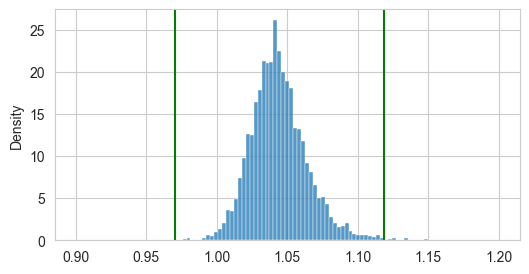

In [40]:
ax = sns.histplot(X, binrange=(0.9,1.2),stat ='density')
ax.axvline(x = interval[0], 
           ymin = 0, 
           ymax = 300, color = 'green') 
ax.axvline(x = interval[1],  
           ymin = 0, 
           ymax = 300, color = 'green') 

> **Francesco:** That does look narrow. But I'm missing the point. What do all these geometrical observations have to do with the price of diamonds?

> **Me:** The point is that, when we did the correlation analysis, we found that the features more correlated with `price` were `carat`, `x`, `y` and `z`. But as we have seen now, we can think that `x`, `y` and `z` explain `carat`. So we can simplify our understanding and think that `price` has a very strong correlation with `carat` on the one hand and  `x`, `y` and `z`, on the other hand, from their relation with `carat`, inherit this dependence; `x`, `y` and `z` can, in a first approximation, be dropped from the analysis.

> **Francesco:** Let me try to rephrase you in order for you to tell me if I am understanding correctly. You mean that, _grosso modo_, `price` is very strongly related to `carat` (which is essentially volume) and the lengths `x`, `y` and `z` just give details of how the volume is constructed.

> **Me:** Yes, exactly.

> **Francesco:** What about the other two features that appear on the right hand side of the volume equation? I mean `table` and `depth`.

> **Me:** Well, let us see. `table` and `depth` are dimensionless length ratios. Clearly they don't define the scaling of the volume at leading order but are relevant when one considers the detailed spatial description of the diamond. Let us define the variables

$$
u_1 = \frac{x y z}{3}\left[1+t(1+t)(1-d)\right],\ \ \ \ \ \ \  
u_2 = K\frac{200}{3.52}
$$

> **Me:** For an ideal diamond these two should be equal to one another, do you agree?

> **Francesco:** Yes, because of the volume formula.

> **Me:** We hypothesize that these two are almost linearly related for real diamonds, ok? How can we check this? We compute the Pearson correlation between those two variables when measured in our diamond sample. We have:

In [41]:
t = data['table']/100
d= data['depth']/100
u1 = (1/3)*data['x']*data['y']*data['z']*(1+t*(1+t)*(1-d))
u2 = data['carat']*200/3.52
u1.corr(u2, method = 'pearson')

0.9975157783250816

> **Me:** We see a Pearson correlation $\sim 1$ between them, this is, in real diamonds, a linear relation almost perfectly explains the statistical relation between $u_1$ and $u_2$.

> **Francesco:** Once again, you are making me impatient. What does this have to do with price??

> **Me:** Once more, as before, this gives us a simplified picture of the relation between price and geometry. From the previous discussion we can say that, approximately, at least as a first approximation of the problem, price is directly related to `carat` (volume) and the relation `carat`-`price` condenses the relation between `price` and all the geometrical features of our dataset. This doesn't mean the all the other geometrical features (`x`, `y`, `z`, `depth` and `table`) are irrelevant, but they do enter the picture as a second order effect once `carat` has been taken into account.

## Cathegorical variables and price

> **Francesco:** So we talked about all the variables except those which you defined as "categorical", the remaining three "c's": `cut`, `color` and `clarity`. If I understood well the interpretation of the Spearman correlation in the heatmap you presented, their relative relevance to explain price is, in order, `clarity`, `color` and `cut`, right?

> **Me:** That is correct, but take into account that their spearman correlation with price was $0.18$, $0.14$ and $0.09$ respectively, this is, much smaller than the correlations with `carat` and `x`, `y` and `z`. To have some perspective on the influence of these three characteristics on price we shall make a "box-plot" of the price for different cuts, colors and clarities.

> **Francesco:** A box-what?

> **Me:** A box-plot. In a box-plot you will find a scale, in this case price. In it you will find a drawing which consists of a solid box with a line inside it. Attached to the sides of the box you find the "whiskers", _i basettoni_. The box goes from the first quartile ($Q_1$) to the third quartile ($Q_3$). These are the values that leave 25% and 75% of the data points below them. The line inside the box is the median ($Q_2$), the point which leaves half the data points below itself. The size of the box is the inter-quartile range $IQR= Q_3-Q1$ and the whiskers extend up to 1.5 times $IQR$ above the $Q_3$ and up to 1.5 times $IQR$ below the $Q_1$.

> **Francesco:** I am not sure if I completely understand. Show them to me and tell me what you see.

> **Me:** Here you go:

Text(0, 0.5, '')

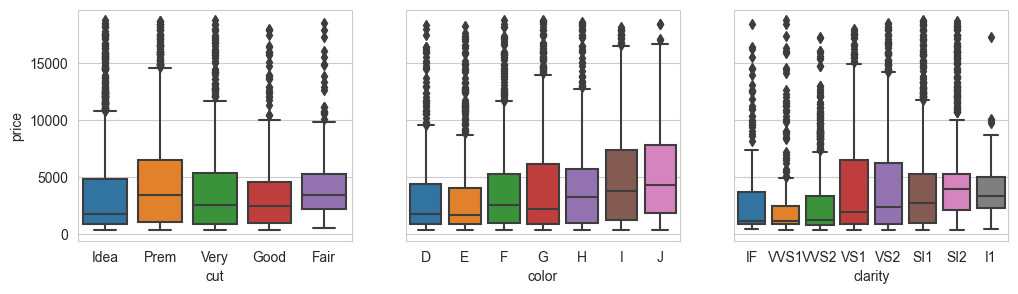

In [42]:
rcParams['figure.figsize'] = 12, 3

sns.set_style("whitegrid")
figure, axis = plt.subplots(1,3, sharey=True)

sns.boxplot(ax = axis[0], x = 'cut',y = 'price', data = data, order=ordered_categories['cut'])
sns.boxplot(ax = axis[1], x = 'color',y = 'price', data = data, order=ordered_categories['color'])
sns.boxplot(ax = axis[2], x = 'clarity',y = 'price', data = data, order=ordered_categories['clarity'])
axis[0].set_ylabel('price')
axis[0].set_xticklabels([cathegory[:4] for cathegory in ordered_categories['cut']])
axis[1].set_ylabel(None)
axis[2].set_ylabel(None)


> **Me:** Two observations you can make of all the box-plots. First, almost every time, the median lies below the middle of the box. Second, the upper part of the whisker is always much larger than the lower part. These two phenomena are typical of a variable which is positively skewed, this is, which has few data points on the upper side that are far from the median and the bulk of the data. The longer upper whisker implies the presence of outliers on the upper side of the data. These are data points that are significantly different from the rest of the data and are likely responsible for the skewness of the distribution. They are specifically marked with points in the diagram.

> **Francesco:** Say it in simple english.

> **Me:** Cheap diamonds are more abundant but you have some diamonds considerably expensive.

> **Francesco:** That seems consistent with my recollection of the diamonds. But what about `cut`, `color` and `clarity`?

> **Me:** Well, regarding `color` I see that every color has similar $Q_1$ and there seems to be a growing `price` trend in median an $Q_3$ when we go from color D to color J. Regarding `clarity`, I see a similar trend only for the median. For `cut` unfortunately I see no clear trend, consistent with the lowest correlation of $0.09$ between `cut` and `price`

## Trends

> **Me:** So Francesco, in conclusion. On a first approximation, we can say that price is very highly correlated with `carat` which as we saw earlier is proportional to volume. All the other geometrical quantities: `x`, `y`, `z`, `table` and `depth` are relevant because they are the geometrical quantities with which we may compute volume and weight of the diamond. Of course, they could be considered second order corrections of a first approximation to the problem. Then we have the categorical variables. We saw some trend with price in the colors and the clarities when looking at the box-plots.

> Consider making a rough graph of `price` versus `carat` to see if we see a trend:


(0.0, 2.6)

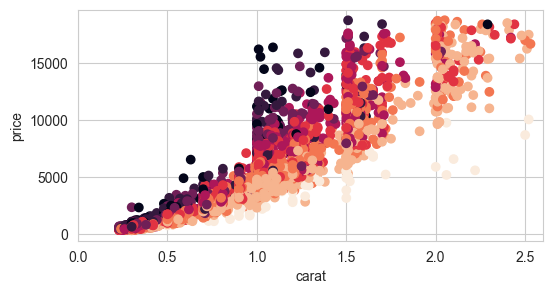

In [43]:
rcParams['figure.figsize'] = 6, 3
X_ = data_enc['carat']
Y_ = data_enc['price']
plt.scatter(X_, Y_, c = data_enc['clarity'])
plt.xlabel("carat"); plt.ylabel("price")
plt.xlim(0,2.6)

> **Francesco:** That doesn't look nice.

> **Me:** No. It doesn't look _that_ nice. But notice that at least we have the main trend: growing `carat` means growing `price`. Remember that we saw on the box-plots some trend in price due to `color` and `clarity`? Let us filter for only one `color` and only one `clarity` and make this plot again:

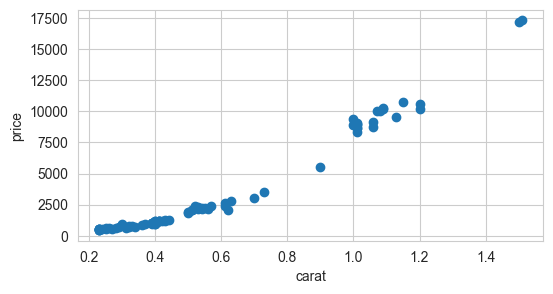

In [44]:
rcParams['figure.figsize'] = 6, 3
X_ = data_enc[(data_enc['color']==2)&(data_enc['clarity']==2)]['carat']
Y_ = data_enc[(data_enc['color']==2)&(data_enc['clarity']==2)]['price']
plt.scatter(X_, Y_)
plt.xlabel("carat"); plt.ylabel("price")
plt.savefig("figs/trend.png", bbox_inches='tight')

> **Francesco:** WOW!! That's much nicer. It shows a clear trend! I could easily make a free-hand drawing of a curve and pass very close to all those points. So let me see if I understood well: you filtered all the data for one color and one clarity and then you plot price vs. carat?

> **Me:** Exactly.

> **Francesco:** Great! I can clearly see the trend. Thank you very much for all these explanations. If you don't mind, I'll show this notebook to another Data Scientist. It is not that I don't trust you... but no, I don't. But don't worry, I trust no one.